<a href="https://colab.research.google.com/github/JMYoon90/JM_python/blob/main/ml03_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Machine Learning(기계 학습)
    * 지도 학습(supervised learning): 레이블이 있는 데이터를 학습.
        * 분류(classification): 클래스를 분류.
        * 회귀(regression): 숫자를 예측.
    * 비지도 학습(unsupervised learning): 레이블이 없는 데이터를 학습.


# 문제 정의

fish 데이터 셋에서 물고기의 무게(Weight)를 다른 변수(특성)들을 사용해서 예측.

* Perch(농어)의 무게를 길이만으로 예측.
    * Weight(관심변수, 종속변수, 타겟, 레이블) ~ Lenght(독립변수, 특성)
* Perch의 무게를 다른 모든 특성들을 사용해서 예측.
    * Weight ~ Length + Diagonal + Height + Width

# Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split # 훈련/테스트 셋 분리
from sklearn.preprocessing import StandardScaler # 특성 스케일링(표준화)
from sklearn.preprocessing import PolynomialFeatures # 다차항을 추가해주는 변환기
from sklearn.pipeline import Pipeline # 변환기와 예측기를 연결해주는 클래스
from sklearn.neighbors import KNeighborsRegressor # KNN 알고리즘을 사용한 숫자 예측
from sklearn.linear_model import LinearRegression # 선형 회귀를 사용한 숫자 예측
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # 회귀 평가 지표들

# 데이터 준비

In [ ]:
# CSV 파일 경로
fish_csv = 'https://github.com/JakeOh/202208_itw_java134_lab_python/raw/main/fish.csv'

In [ ]:
# DataFrame 생성
fish_df = pd.read_csv(fish_csv)

In [ ]:
fish_df.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [ ]:
fish_df.Species.value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

# Perch의 Weight를 Length로 예측

In [ ]:
perch = fish_df[fish_df.Species == 'Perch']
perch.head()

,Species,Weight,Length,Diagonal,Height,Width
72,Perch,5.9,8.4,8.8,2.1120,1.4080
73,Perch,32.0,13.7,14.7,3.5280,1.9992
74,Perch,40.0,15.0,16.0,3.8240,2.4320
75,Perch,51.5,16.2,17.2,4.5924,2.6316
76,Perch,70.0,17.4,18.5,4.5880,2.9415


In [ ]:
# X: 특성 배열(2d-array), y: 타겟 배열(1d-array)
X = perch[['Length']].values #> (56, 1) shape의 2d-array
y = perch['Weight'].values #> (56, )

In [ ]:
X.shape, y.shape

((56, 1), (56,))

## train/test split

In [ ]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, 
                                          test_size=0.25,
                                          random_state=42)

In [ ]:
X_tr.shape, X_te.shape, y_tr.shape, y_te.shape

((42, 1), (14, 1), (42,), (14,))

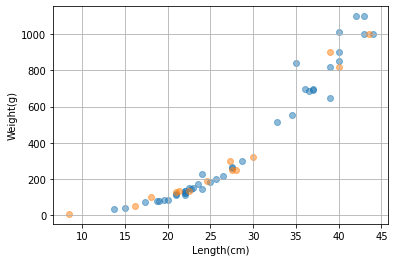

In [ ]:
# Weight ~ Length 시각화. 훈련/테스트 셋의 색깔을 다르게 표현.
plt.scatter(X_tr.ravel(), y_tr, alpha=0.5, label='Train set')
plt.scatter(X_te.ravel(), y_te, alpha=0.5, label='Test set')

plt.xlabel('Length(cm)')
plt.ylabel('Weight(g)')
plt.grid()
plt.show()

## KNN Regressor 모델 훈련, 평가

1. KNN 모델 생성
1. KNN 모델을 훈련 셋으로 훈련
1. 평가
    1. 훈련 셋 평가
    1. 테스트 셋 평가

In [ ]:
knn_reg = KNeighborsRegressor() # ML 모델 생성

In [ ]:
knn_reg.fit(X_tr, y_tr) # 모델 훈련 - 지도 학습

KNeighborsRegressor()

In [ ]:
y_tr_pred = knn_reg.predict(X_tr) # 훈련 셋의 (무게) 예측값
print(y_tr_pred)

[  88.6  123.    79.6   70.6  723.   193.   847.   847.  1010.   123.
   95.   123.   174.   248.  1010.   847.   174.   113.   248.   847.
  659.   224.   723.    60.   140.    60.   719.   694.2  248.   167.
  847.   113.   168.   123.  1010.   136.    79.6  719.   123.   193.
  990.   659. ]


In [ ]:
print(y_tr) # 훈련 셋의 (무게) 실젯값

[  85.  135.   78.   70.  700.  180.  850.  820. 1000.  120.   85.  130.
  225.  260. 1100.  900.  145.  115.  265. 1015.  514.  218.  685.   32.
  145.   40.  690.  840.  300.  170.  650.  110.  150.  110. 1000.  150.
   80.  700.  120.  197. 1100.  556.]


KNN(K-Nearest Neighbors) Regressor는 샘플에서 가장 가까운 k개의 훈련 셋의 레이블(타겟)들의 평균으로 숫자를 예측하는 ML 모델.

In [ ]:
# 첫번째 훈련 샘플에서 가장 가까운 이웃 5개의 인덱스
indices = knn_reg.kneighbors(X_tr[0].reshape((1, -1)), return_distance=False)
print(indices)

[[ 0 10 36  2 17]]


In [ ]:
y_tr[indices[0]] # 가장 가까운 이웃 5개의 무게(타겟)들의 평균

array([ 85.,  85.,  80.,  78., 115.])

In [ ]:
# 테스트 셋의 예측값
y_te_pred = knn_reg.predict(X_te)
print(y_te_pred)

[  60.    79.6  248.   122.   136.   847.   311.4  183.4  847.   113.
 1010.    60.   248.   248. ]


In [ ]:
print(y_te) # 테스트 셋의 실제값

[   5.9  100.   250.   130.   130.   820.   320.   188.   900.   125.
 1000.    51.5  250.   300. ]


## 회귀 모델 평가 지표

* MAE(Mean Absolute Error): 오차들의 절대값 평균.
* MSE(Mean Squared Error): 오차들의 제곱 평균.
* RMSE(Root Mean Squared Error): MSE의 제곱근.
* MAE, MSE, RMSE는 값이 작을 수록 좋은 점수. 값이 작을 수록 더 좋은 회귀 모델.
    * 평가 지표는 일반적으로 값이 클수록 좋은 점수, 값이 작을 수록 나쁜 점수로 생각.
    * 회귀에서도 오차가 작을 수록 점수가 높아지고, 오차가 클 수록 점수가 낮아지는 평가 지표를 개발 -> R2 score(결정계수)
    * R2 score는 1에 가까울 수록 오차가 작은 모델, 작을 수록 오차가 큰 모델.

In [ ]:
# 훈련 셋 평가 지표들
print('MAE:', mean_absolute_error(y_tr, y_tr_pred))
print('MSE:', mean_squared_error(y_tr, y_tr_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_tr, y_tr_pred)))
print('R2 score:', r2_score(y_tr, y_tr_pred))

MAE: 35.76190476190476
MSE: 3716.5161904761903
RMSE: 60.96323638453089
R2 score: 0.9698823289099254


In [ ]:
# 테스트 셋 평가 지표들
print('MAE:', mean_absolute_error(y_te, y_te_pred))
print('MSE:', mean_squared_error(y_te, y_te_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_te, y_te_pred)))
print('R2 score:', r2_score(y_te, y_te_pred))

MAE: 19.157142857142862
MSE: 721.7385714285714
RMSE: 26.865192562655704
R2 score: 0.992809406101064
